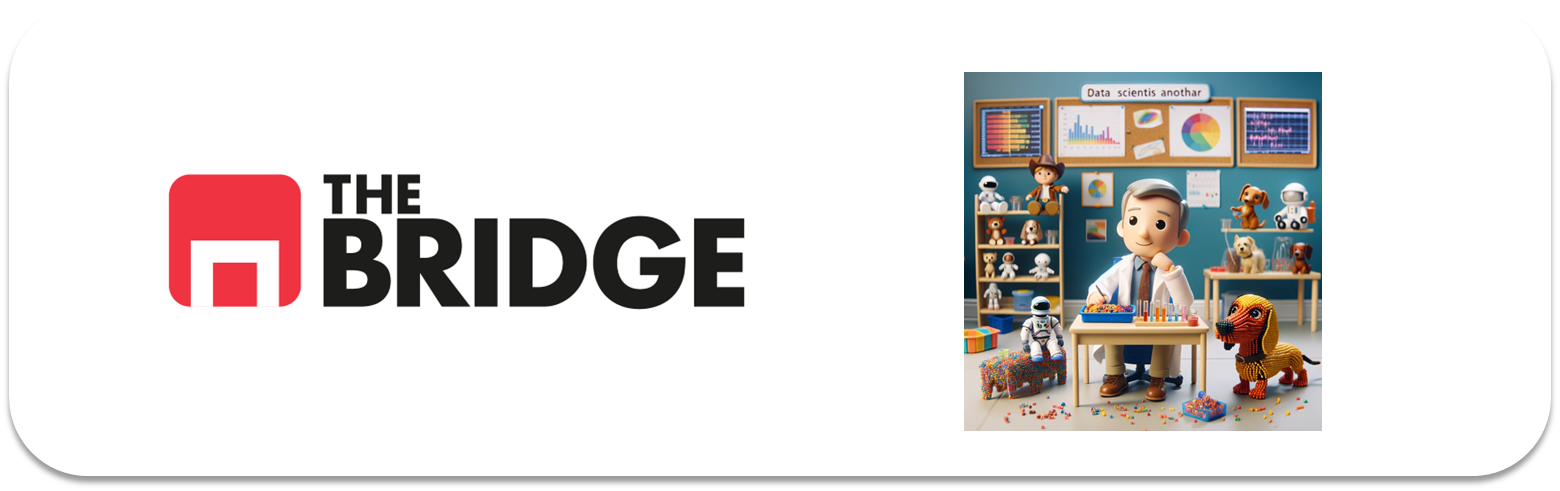

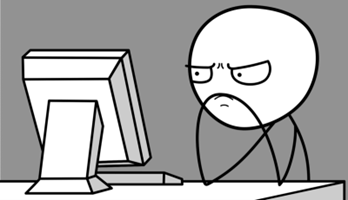

Para ejercitarte y afianzar lo aprendido sobre dispersión, distribución y outliers, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs # función para crear gráfico con histograma con función de densidad y boxplot

In [19]:
# función para calcular el Coeficiente de Variación 
def CV(df):
    df_var = df.describe().loc[["std","mean"]].T #crear un nuevo df con medidas std y mean
    df_var["CV"] = df_var["std"] / df_var["mean"]*100 # crear una columna con el CV
    return df_var

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/car_crashes.csv", muestra un parte de su contenido y la info general del mismo

In [4]:
df = pd.read_csv("./data/car_crashes.csv",sep="|")

In [5]:
df.head(5)

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   total           51 non-null     float64
 2   speeding        51 non-null     float64
 3   alcohol         51 non-null     float64
 4   not_distracted  51 non-null     float64
 5   no_previous     51 non-null     float64
 6   ins_premium     51 non-null     float64
 7   ins_losses      51 non-null     float64
 8   abbrev          51 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.7+ KB


### Ejercicio 2

Haz una pequeña descripción de lo que crees que puede representar cada una de las variables y de que puede representar el dataset. Aunque para algunas se proporciona aquí:

* "total" - Número de accidentes fatales por colisión de vehículos por mil millones de millas
* "ins_premiums" - Prima media de Seguros de Automóviles ($)
* "ins_losses" - Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)

**ACLARACION IMPORTANTE**: El resto de columnas están dadas en las mismas unidades que total (numero de accidentes fatales por mil millones de millas)

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Unnamed:0|Índice único por compañía de seguros|||||
|Total|Número de accidentes fatales por colisión de vehículos por mil millones de millas|||||
|Speed|Velocidad por colisión de vehículos por mil millones de millas|||||
|Alcohol|Grado de alcoholemia del conductor por colisión de vehículos por mil millones de millas|||||
|not_distracted|Accidentes no debido a una distracción por colisión de vehículos por mil millones de millas|||||
|no_previous|Accidentes en los que el conductor no ha tenido otros accidentes previos por colisión de vehículos por mil millones de millas|||||
|ins_premium|Prima media de Seguros de Automóviles ($)|||||
|ins_losses|Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)|||||
|abbrev|Estado|||||


### Ejercicio 3

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.  

**IMPORTANTE**:
*Al ser los valores porcentajes, tenemos que convertirlos a valores absolutos (multiplicar los valores de las columnas de cada fila por el total de esa fila, excepto total) si queremos poder contabilizar medias reales entre todos los estados*  


In [7]:
df.describe()

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,25.000000,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,14.866069,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,0.000000,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.500000,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,25.000000,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,37.500000,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,50.000000,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [11]:
col_abs = ["speeding",
           "alcohol",
           "not_distracted",
           "no_previous"]

for col in col_abs:
    name = f"{col}_abs"
    df[name] = df[col] * df["total"]

In [ ]:
df.head(5)

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,speeding_abs,alcohol_abs,not_distracted_abs,no_previous_abs
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,137.8416,106.0320,339.3024,282.7520
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,134.3201,81.9025,294.8490,307.9534
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,121.0860,96.8688,290.6064,332.1216
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,90.3168,130.4576,471.6544,476.6720
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,50.4000,40.3200,131.0400,128.1600


### Ejercicio 4

¿Qué puedes decir de la variable abbrev?¿Qué crees que podríamos hacer con ella?¿Le cambiarías el nombre?

In [13]:
df.rename(columns={"abbrev":"state"},inplace=True)

Nota: Para los siguientes ejercicios te convendrá hacerte una función que obtenga el CV (Coeficiente de variación), y guardárla para el futuro

### Ejercicio 5

Analiza `speeding` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [16]:
CV(df[["speeding_abs","alcohol_abs","not_distracted_abs","no_previous_abs","ins_premium","ins_losses"]])

,std,mean,CV
speeding_abs,49.059831,83.909102,58.467830
alcohol_abs,49.507659,83.121118,59.560868
not_distracted_abs,129.111280,229.402576,56.281530
no_previous_abs,116.510959,235.686873,49.434641
ins_premium,178.296285,886.957647,20.102007
ins_losses,24.835922,134.493137,18.466312


(2,)


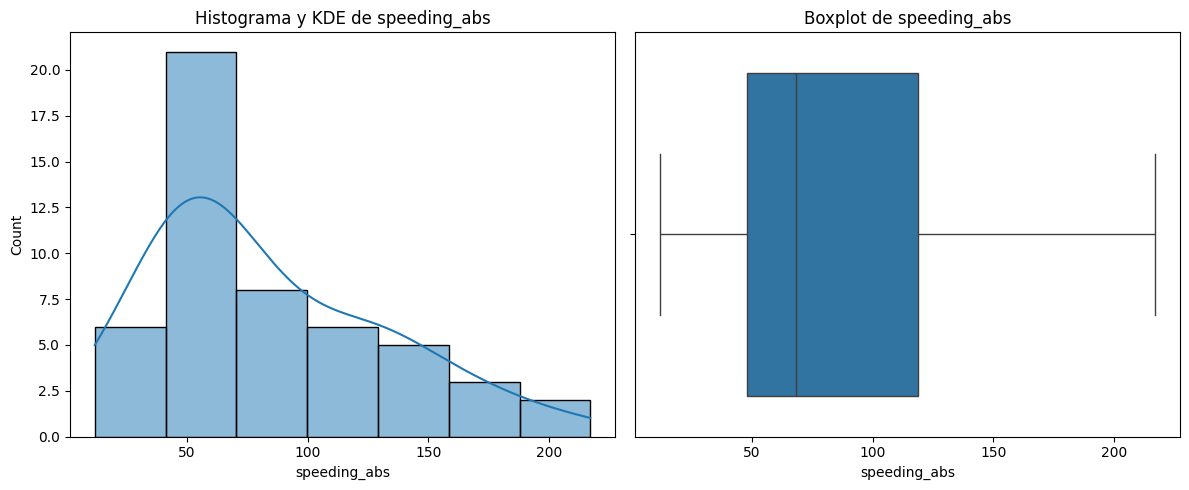

In [26]:
plot_combined_graphs(df, ["speeding_abs"])

### Ejercicio 6

Analiza `alcohol` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

(2,)


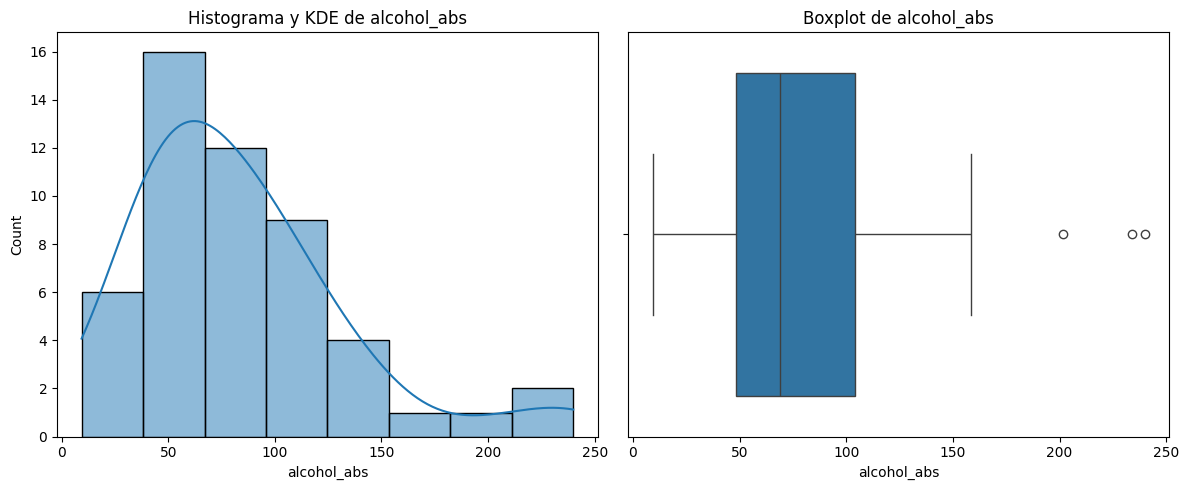

In [27]:
plot_combined_graphs(df, ["alcohol_abs"])

### Ejercicio 7

Analiza `not_distracted` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

(2,)


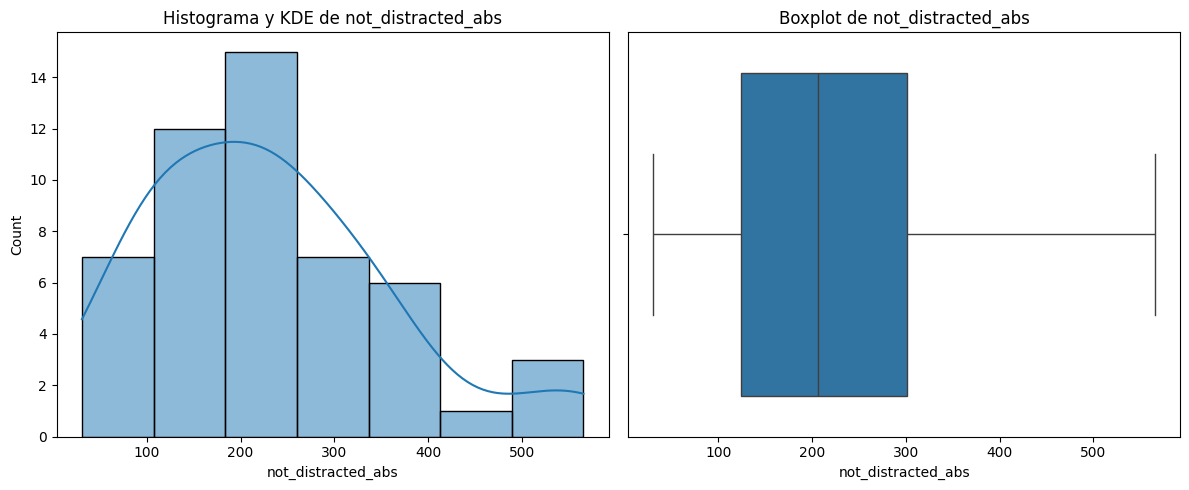

In [28]:
plot_combined_graphs(df, ["not_distracted_abs"])

### Ejercicio 8

El diagrama de violín es un tipo de gráfico que no hemos usado pero que tu puedes usar para tu análisis. Combina elementos de diagrama de caja y de la estimación de la función de densidad. 

Ejecuta la siguiente celda y luego dibuja el boxplot y el histograma combinado con la función de densidad para ver qué te parece más interesante. Usa `plot_combined_graphs`)

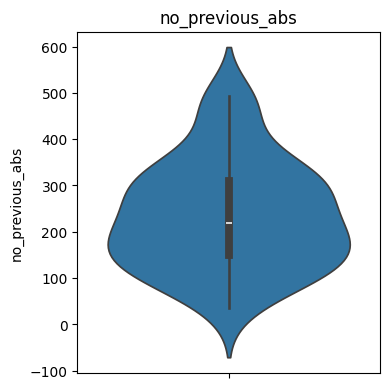

In [29]:
from bootcampviztools import mostrar_diagramas_violin

mostrar_diagramas_violin(df, ["no_previous_abs"])

(2,)


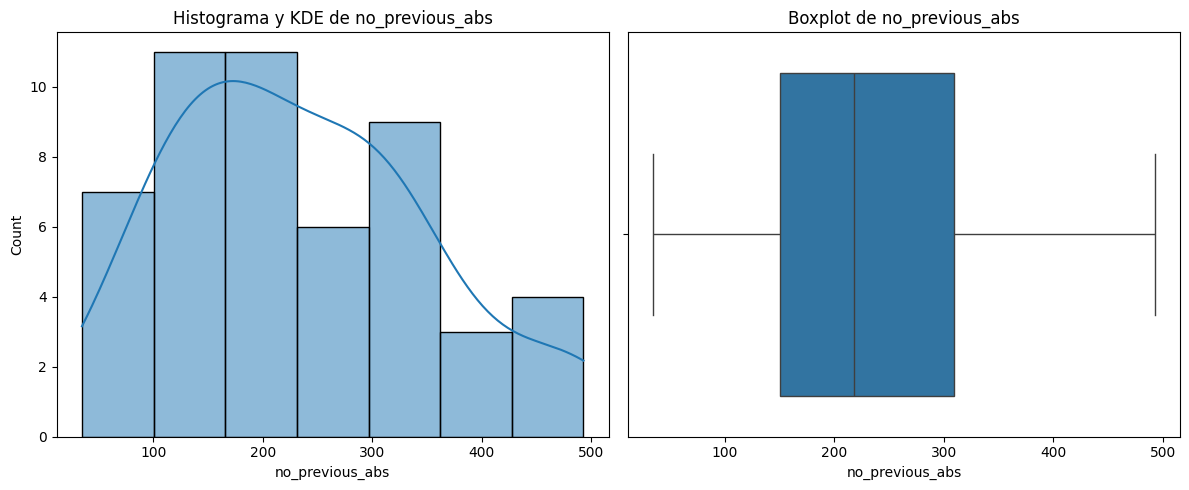

In [30]:
plot_combined_graphs(df, ["no_previous_abs"])

La figura presenta un plotbox interno con la mediana marcada con una línea gruesa y el rango intercuartílico dibujado en el centro, además de que la forma se lo da la función densidad estimada (replicada simétricamente):

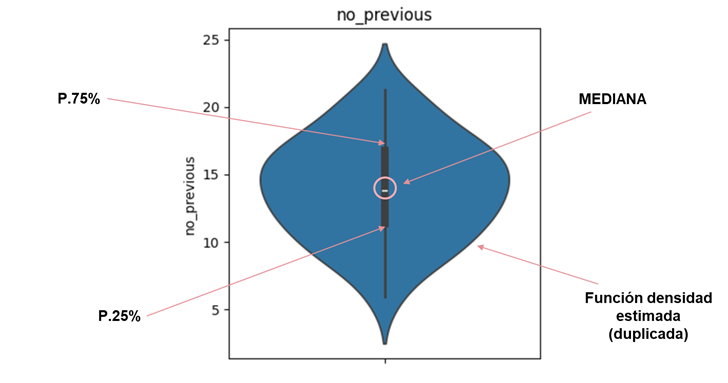

### Ejercicio 9

Completa el análisis de "no_previous" con su CV y sus medidas de tendencia central. ¿Qué destacarías? (considera gráficas y medidas obtenidas en este apartado)

In [33]:
CV(df["no_previous_abs"])

std     116.510959
mean    235.686873
CV       49.434641
Name: no_previous_abs, dtype: float64

In [32]:
df.no_previous_abs.describe()

count     51.000000
mean     235.686873
std      116.510959
min       34.810000
25%      150.269850
50%      217.736400
75%      308.881250
max      492.802800
Name: no_previous_abs, dtype: float64

### Ejercicio 10

Carga el dataset de los seguros ("./data/Marketing-Customer-Analysis.csv") en un datafame y pinta la gráfica de caja y el histograma de "customer_lifetime_value"

In [34]:
df = pd.read_csv("./data/Marketing-Customer-Analysis.csv")

(2,)


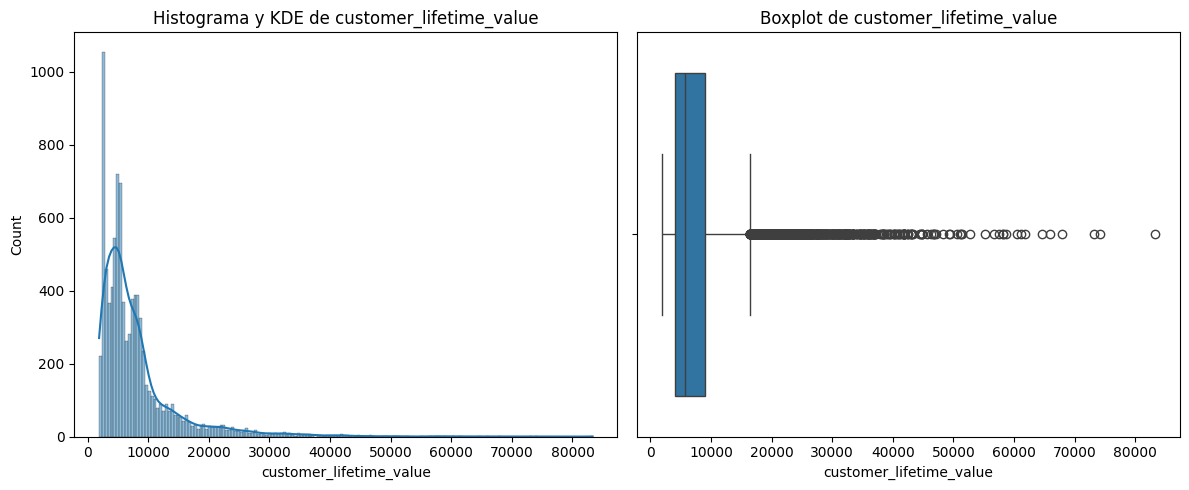

In [38]:
plot_combined_graphs(df, ["customer_lifetime_value"])

### Ejercicio 11

Para "customer_lifetime_value", escoge un umbral para marcar como outliers los valores que lo superen. Divide el dataframe en dos usando ese valor.

- valor outlier = 20000

In [41]:
umbral = df["customer_lifetime_value"] >= 20000

# Filtrar los outliers y reasignar al DataFrame original
df_outliers = df.loc[umbral]
df = df.loc[~umbral]

### Ejericicio 12

Compara los histogramas para "customer_lifetime_value" de cada dataframe. ¿Qué conclusiones sacas?

(2,)


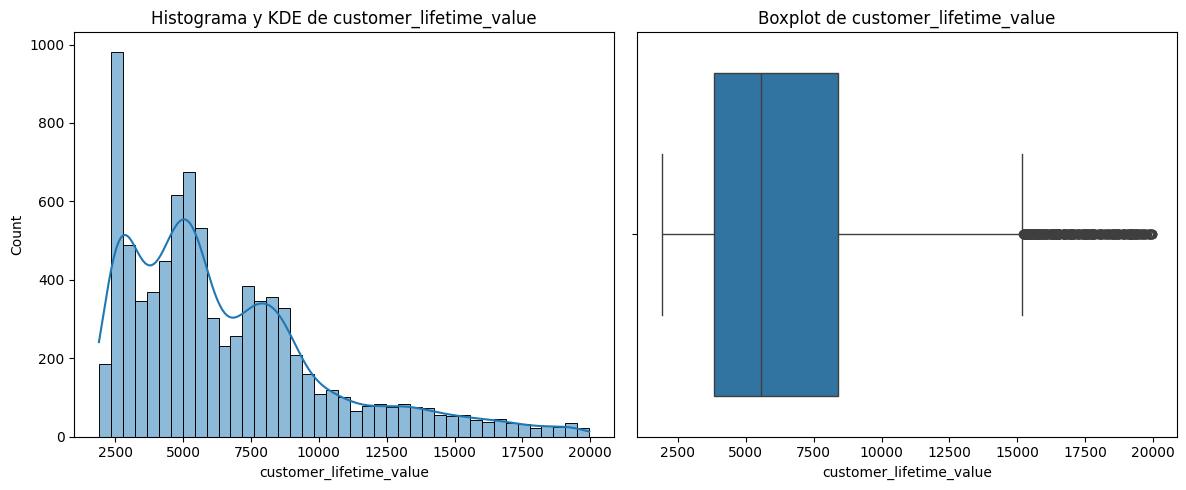

In [43]:
plot_combined_graphs(df, ["customer_lifetime_value"])

(2,)


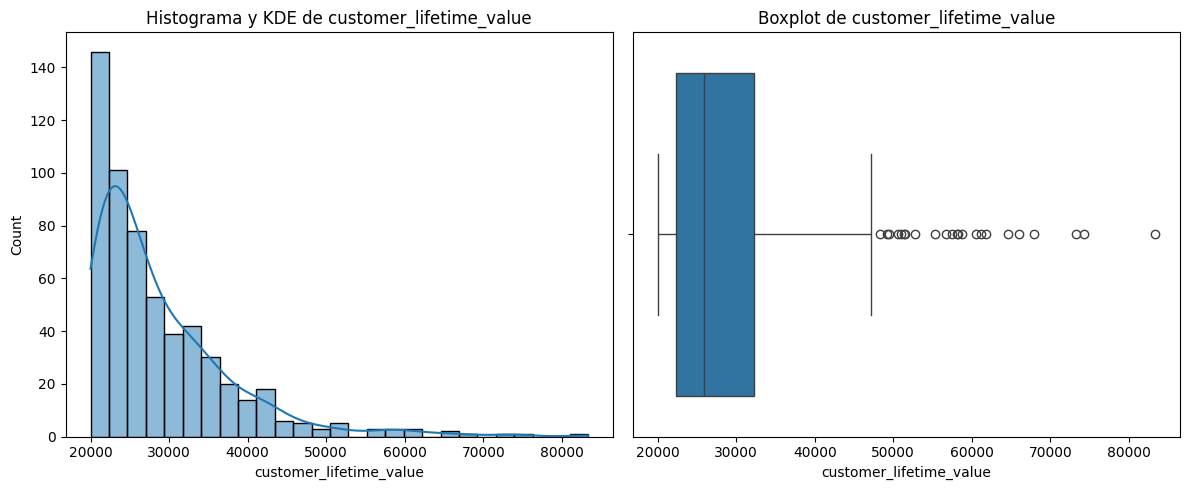

In [45]:
plot_combined_graphs(df_outliers, ["customer_lifetime_value"])